<a href="https://colab.research.google.com/github/ulwanfaqih/Portofolio/blob/main/Insight_dan_Segmentasi_Data_Pelanggan_Restoran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Insight & Segmentasi dari Data Pelanggan Restoran** *(On Progress)*
oleh : Muhammad Ulwan Faqih


---



Tujuan : 
1. Mencari Insight-Insight dari data 
2. Melakukan Segmentasi pelanggan


---


---




# Import Library

In [118]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import pickle



---


---




# DATA

In [119]:
import seaborn as sns
data_resto = sns.load_dataset('tips') 
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data merupakan data pelanggan restoran yang diperoleh dari 'seaborn-tips'. yang berukuran 244 baris data dan 7 kolom variabel

variabel-variabel tersebut adalah :
1. total_bill = total tagihan pelanggan selama sekali kunjungan
2. tip = tip yang diberikan pelanggan selama sekali kunjungan
3. sex = jenis kelamin (male/female)
4. smoker = perokok / tidak perokok (yes/no)
5. day = hari kunjungan (thus/fri/sat/sun)
6. time = waktu kunjungan (dinner/lunch)
7. size = banyak orang sekali kunjungan (1/2/3/4/5/6)

In [120]:
# Mengecek Keunikan Variabel
print(data_resto['size'].unique())
print(data_resto['sex'].unique())
print(data_resto['smoker'].unique())
print(data_resto['day'].unique())
print(data_resto['time'].unique())

[2 3 4 1 6 5]
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']
['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']


In [121]:
data_resto.shape

(244, 7)

In [122]:
data_resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


meskipun data terlihat rapih, tetap harus di cek kerapihannya, **akan dilakukan pre-processing**


---


---




# Pre-Processing



---


**mengecek missing value**

In [123]:
print(data_resto.isnull().sum())
print(data_resto.isnull().sum().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
0


tidak ditemukan missing value


---







**mengecek duplikasi**

In [124]:
print(data_resto.shape)
data_resto.duplicated().sum()

(244, 7)


1

ditemukan 1 duplikasi

In [125]:
data_resto.drop_duplicates(inplace=True)
print(data_resto.duplicated().sum()) 
print(data_resto.shape) 

0
(243, 7)


data setelah dihapus duplikasi menjadi 243 baris data, dan setelah kiranya data sudah rapih, **maka selanjutnya akan dicari insight**


---



---



# Insight from Data

In [9]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4




---



**1 Variabel**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Tagihan'),
 Text(0.5, 1.0, 'Plot Distribusi Total Tagihan')]

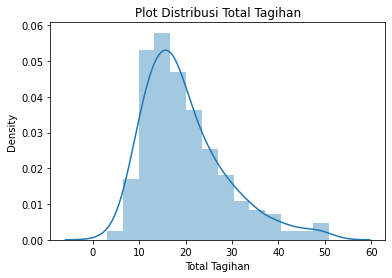

In [10]:
p = sns.distplot(data_resto['total_bill'])
p.set(xlabel='Total Tagihan', title='Plot Distribusi Total Tagihan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Tip Pelanggan'),
 Text(0.5, 1.0, 'Plot Distribusi Tip Pelanggan')]

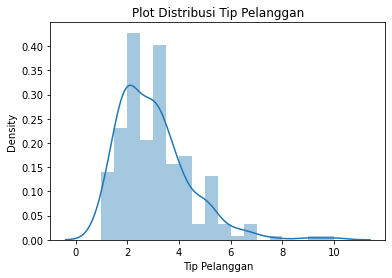

In [11]:
p = sns.distplot(data_resto['tip'])
p.set(xlabel='Tip Pelanggan', title='Plot Distribusi Tip Pelanggan')

[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Jenis Kelamin'),
 Text(0.5, 1.0, 'Jumlah Pelanggan Pria dan Wanita')]

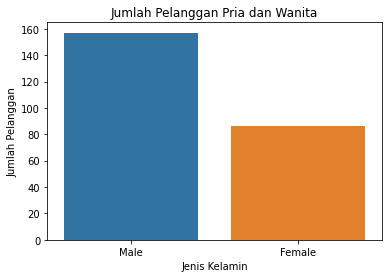

In [12]:
p = sns.countplot(x ="sex",data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Pria dan Wanita')

dapat dilihat dari visualisasi, **pelanggan pria hampir 2 kali lebih banyak dari pelanggan wanita**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Perokok'),
 Text(0.5, 1.0, 'Jumlah Pelanggan Perokok dan Bukan Perokok')]

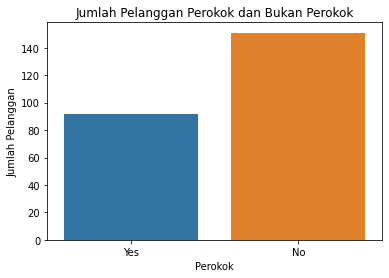

In [13]:
p = sns.countplot(x ="smoker",data=data_resto)
p.set(xlabel='Perokok', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Perokok dan Bukan Perokok')

dapat dilihat dari visualisasi, **lebih banyak pelanggan yang tidak merokok**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Hari'),
 Text(0.5, 1.0, 'Jumlah Pelanggan per Hari')]

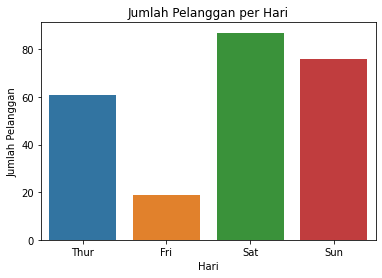

In [14]:
p = sns.countplot(x ="day",data=data_resto)
p.set(xlabel='Hari', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan per Hari')

dapat dilihat dari visualisasi, **restoran kedatangan banyak pelanggan di hari sabtu dan minggu, dan sedikit pelanggan di hari jumat**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Waktu Kedatangan'),
 Text(0.5, 1.0, 'Jumlah Pelanggan menurut Waktu Kedatangan')]

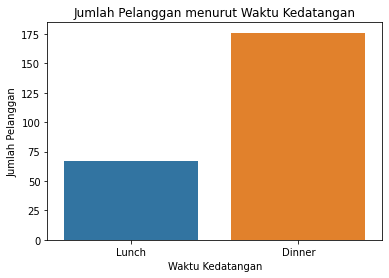

In [15]:
p = sns.countplot(x ="time",data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan menurut Waktu Kedatangan')

dapat dilihat dari visualisasi,**pelanggan restoran lebih banyak yang datang untuk makan malam dibanding makan siang**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Banyak Pelanggan Sekali Kunjungan'),
 Text(0.5, 1.0, 'Jumlah Banyak Pelanggan Dalam Sekali Kunjungan')]

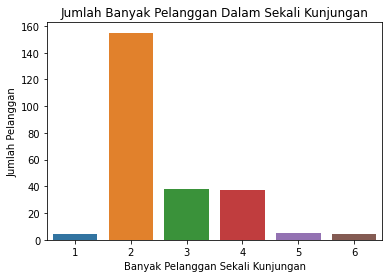

In [16]:
p = sns.countplot(x ="size",data=data_resto)
p.set(xlabel='Banyak Pelanggan Sekali Kunjungan', ylabel='Jumlah Pelanggan', title='Jumlah Banyak Pelanggan Dalam Sekali Kunjungan')

dari visualisasi dapat terlihat, **pelanggan restoran lebih banyak datang berdua yang kemungkinan adalah pasangan**



---



**2 Variabel**

In [17]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4




---



[Text(0, 0.5, 'Total Tagihan'),
 Text(0.5, 0, 'Tip Pelanggan'),
 Text(0.5, 1.0, 'Scatter Plot Total Tagihan & Tip Pelanggan')]

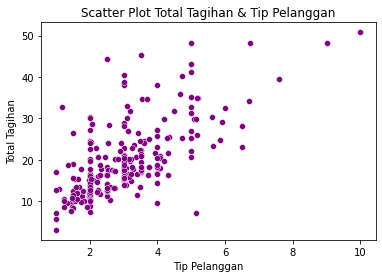

In [18]:
p = sns.scatterplot(y=data_resto['total_bill'], x=data_resto['tip'], marker = 'o', color='purple')
p.set(xlabel='Tip Pelanggan', ylabel='Total Tagihan', title='Scatter Plot Total Tagihan & Tip Pelanggan')

dapat dilihat dari visualisasi, **semakin besar Total Tagihan, relatif semakin besar juga Tip yang diberikan**


---



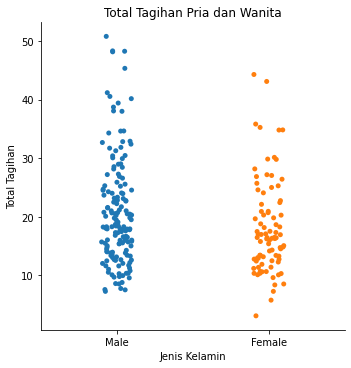

In [19]:
p = sns.catplot(x="sex", y="total_bill", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Total Tagihan', title='Total Tagihan Pria dan Wanita')

dapat dilihat dari visualisasi, **dari pelanggan pria ataupun wanita keduanya relatif menghabiskan uangnya dalam jumlah yang sama, kebanyakan di nilai sekitar 10-30**


---



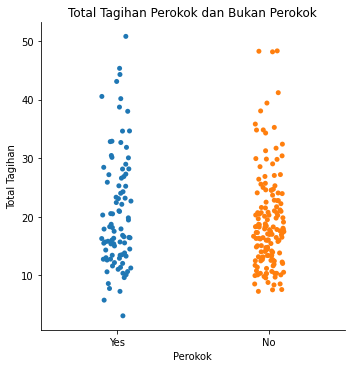

In [20]:
p = sns.catplot(x="smoker", y="total_bill", data=data_resto)
p.set(xlabel='Perokok', ylabel='Total Tagihan', title='Total Tagihan Perokok dan Bukan Perokok')

dapat dilihat dari visualisasi, **dari pelanggan perokok ataupun bukan keduanya relatif menghabiskan uangnya dalam jumlah yang sama, kebanyakan di nilai sekitar 10-30**


---



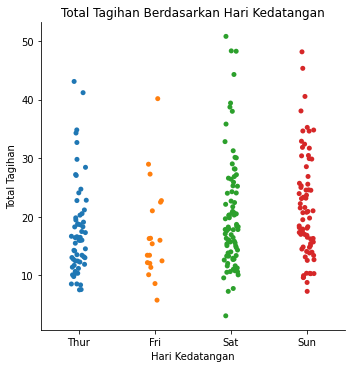

In [21]:
p = sns.catplot(x="day", y="total_bill", data=data_resto)
p.set(xlabel='Hari Kedatangan', ylabel='Total Tagihan', title='Total Tagihan Berdasarkan Hari Kedatangan')

dapat dilihat dari visualisasi, **dari pelanggan dihari kamis-minggu, semuanya relatif menghabiskan uangnya dalam jumlah yang sama, kebanyakan di nilai sekitar 10-30**


---



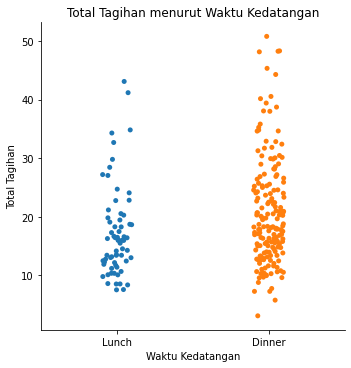

In [22]:
p = sns.catplot(x="time", y="total_bill", data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Total Tagihan', title='Total Tagihan menurut Waktu Kedatangan')

karena pengunjung makan malam lebih banyak, **dapat dilihat dari visualiasi, total tagihan yang dihabiskan di makan malam relatif lebih banyak dari yang makan siang, makan siang(sekitar 7,5-30) makan malam(sekitar 7,5-40)**


---



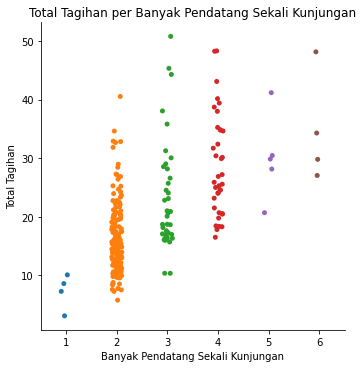

In [23]:
p = sns.catplot(x="size", y="total_bill", data=data_resto)
p.set(xlabel='Banyak Pendatang Sekali Kunjungan', ylabel='Total Tagihan', title='Total Tagihan per Banyak Pendatang Sekali Kunjungan')

dapat dilihat dari visualisasi, **semakin besar pendatang sekali kunjungan relatif semakin besar juga Total Tagihannya**


---



In [24]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


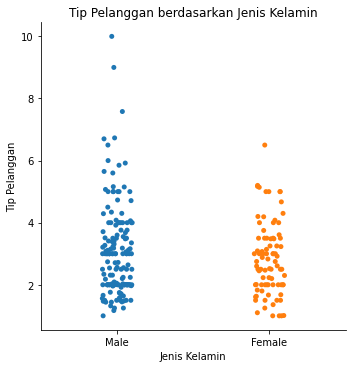

In [25]:
p = sns.catplot(x="sex", y="tip", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Tip Pelanggan', title='Tip Pelanggan berdasarkan Jenis Kelamin')

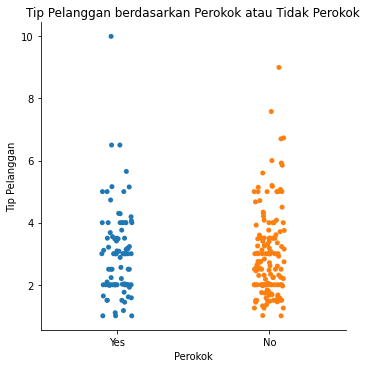

In [26]:
p = sns.catplot(x="smoker", y="tip", data=data_resto)
p.set(xlabel='Perokok', ylabel='Tip Pelanggan', title='Tip Pelanggan berdasarkan Perokok atau Tidak Perokok')

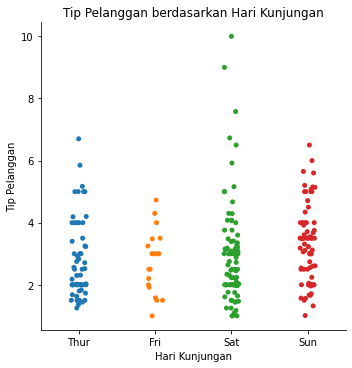

In [27]:
p = sns.catplot(x="day", y="tip", data=data_resto)
p.set(xlabel='Hari Kunjungan', ylabel='Tip Pelanggan', title='Tip Pelanggan berdasarkan Hari Kunjungan')

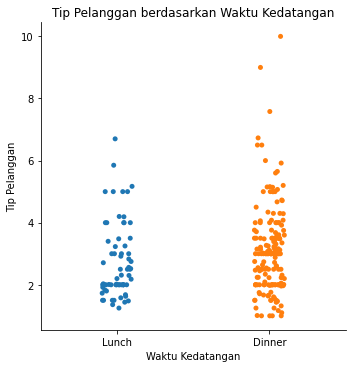

In [28]:
p = sns.catplot(x="time", y="tip", data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Tip Pelanggan', title='Tip Pelanggan berdasarkan Waktu Kedatangan')

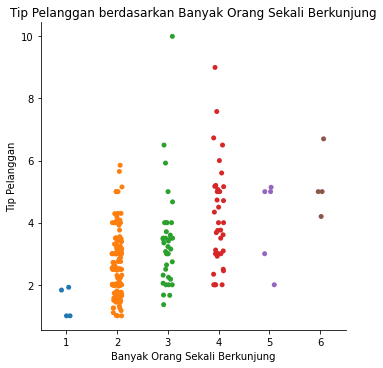

In [29]:
p = sns.catplot(x="size", y="tip", data=data_resto)
p.set(xlabel='Banyak Orang Sekali Berkunjung', ylabel='Tip Pelanggan', title='Tip Pelanggan berdasarkan Banyak Orang Sekali Berkunjung')

In [30]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


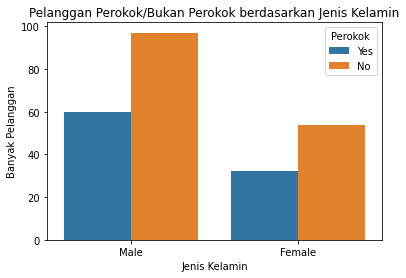

In [31]:
p = sns.countplot(x="sex", hue="smoker", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Banyak Pelanggan', title='Pelanggan Perokok/Bukan Perokok berdasarkan Jenis Kelamin')
p.legend(title = "Perokok", loc = 0)

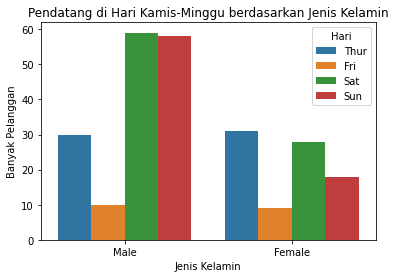

In [32]:
p = sns.countplot(x="sex", hue="day", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Banyak Pelanggan', title='Pendatang di Hari Kamis-Minggu berdasarkan Jenis Kelamin')
p.legend(title = "Hari", loc = 0)

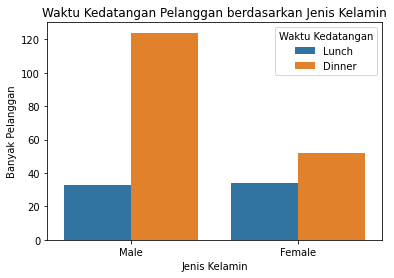

In [33]:
p = sns.countplot(x="sex", hue="time", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Banyak Pelanggan', title='Waktu Kedatangan Pelanggan berdasarkan Jenis Kelamin')
p.legend(title = "Waktu Kedatangan", loc = 0)

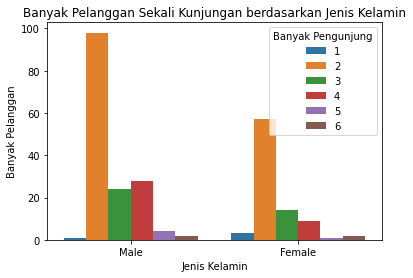

In [34]:
p = sns.countplot(x="sex", hue="size", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Banyak Pelanggan', title='Banyak Pelanggan Sekali Kunjungan berdasarkan Jenis Kelamin')
p.legend(title = "Banyak Pengunjung", loc = 0)

In [35]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


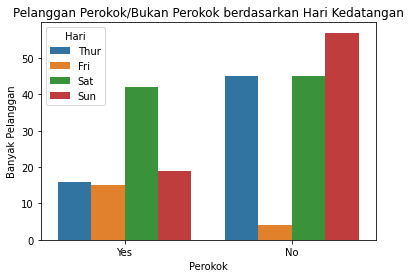

In [36]:
p = sns.countplot(x="smoker", hue="day", data=data_resto)
p.set(xlabel='Perokok', ylabel='Banyak Pelanggan', title='Pelanggan Perokok/Bukan Perokok berdasarkan Hari Kedatangan')
p.legend(title = "Hari", loc = 0)

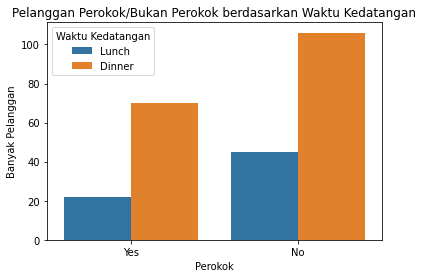

In [37]:
p = sns.countplot(x="smoker", hue="time", data=data_resto)
p.set(xlabel='Perokok', ylabel='Banyak Pelanggan', title='Pelanggan Perokok/Bukan Perokok berdasarkan Waktu Kedatangan')
p.legend(title = "Waktu Kedatangan", loc = 0)

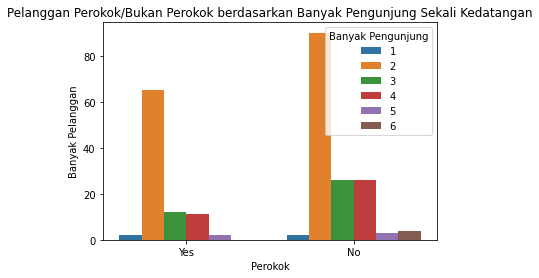

In [38]:
p = sns.countplot(x="smoker", hue="size", data=data_resto)
p.set(xlabel='Perokok', ylabel='Banyak Pelanggan', title='Pelanggan Perokok/Bukan Perokok berdasarkan Banyak Pengunjung Sekali Kedatangan')
p.legend(title = "Banyak Pengunjung", loc = 0)

In [39]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


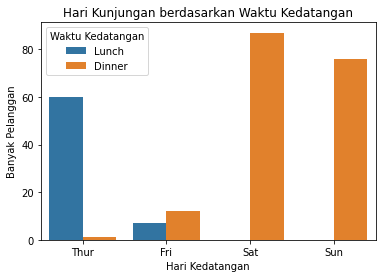

In [40]:
p = sns.countplot(x="day", hue="time", data=data_resto)
p.set(xlabel='Hari Kedatangan', ylabel='Banyak Pelanggan', title='Hari Kunjungan berdasarkan Waktu Kedatangan')
p.legend(title = "Waktu Kedatangan", loc = 0)

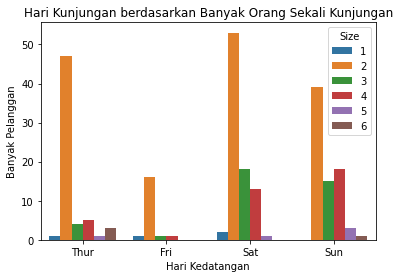

In [41]:
p = sns.countplot(x="day", hue="size", data=data_resto)
p.set(xlabel='Hari Kedatangan', ylabel='Banyak Pelanggan', title='Hari Kunjungan berdasarkan Banyak Orang Sekali Kunjungan')
p.legend(title = "Size", loc = 0)

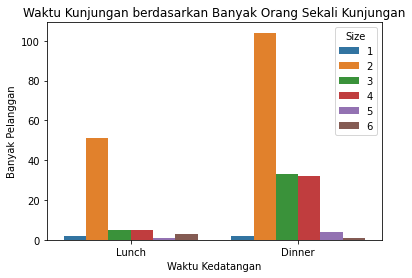

In [42]:
p = sns.countplot(x="time", hue="size", data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Banyak Pelanggan', title='Waktu Kunjungan berdasarkan Banyak Orang Sekali Kunjungan')
p.legend(title = "Size", loc = 0)



---



**3 Variabel**

In [43]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


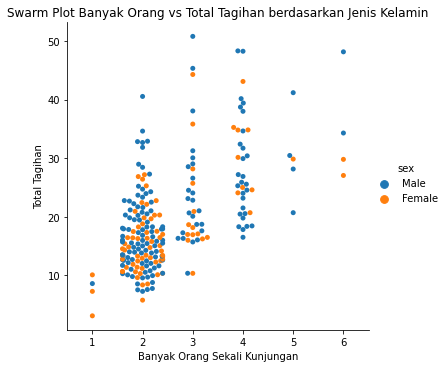

In [44]:
p= sns.catplot(x= "size", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)
p.set(xlabel='Banyak Orang Sekali Kunjungan', ylabel='Total Tagihan', title='Swarm Plot Banyak Orang vs Total Tagihan berdasarkan Jenis Kelamin')

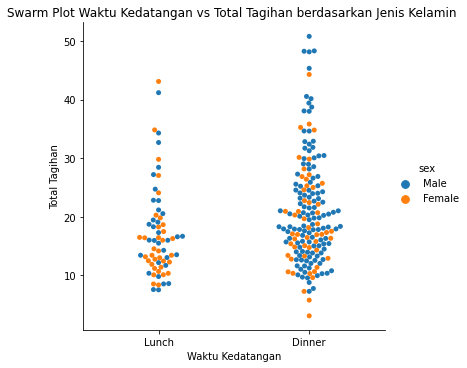

In [45]:
p= sns.catplot(x= "time", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Total Tagihan', title='Swarm Plot Waktu Kedatangan vs Total Tagihan berdasarkan Jenis Kelamin ')

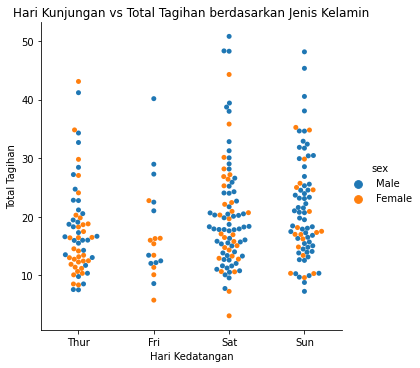

In [46]:
p= sns.catplot(x= "day", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)
p.set(xlabel='Hari Kedatangan', ylabel='Total Tagihan', title='Hari Kunjungan vs Total Tagihan berdasarkan Jenis Kelamin')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

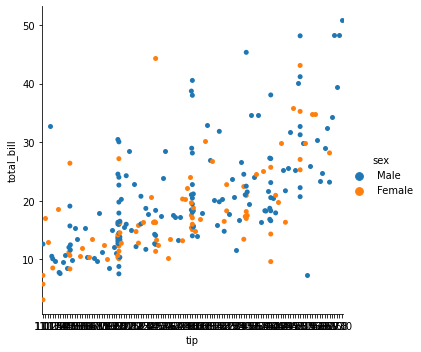

In [47]:
p= sns.catplot(x= "tip", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

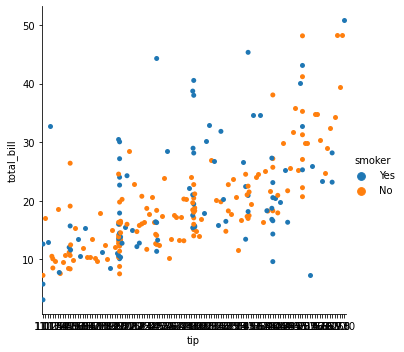

In [48]:
p= sns.catplot(x= "tip", y="total_bill", hue ="smoker" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

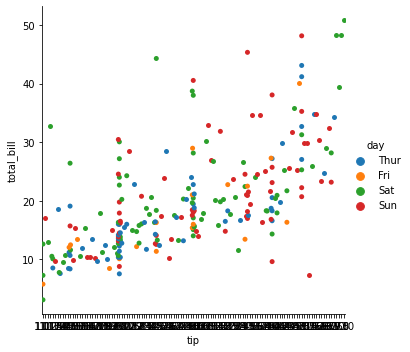

In [49]:
p= sns.catplot(x= "tip", y="total_bill", hue ="day" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

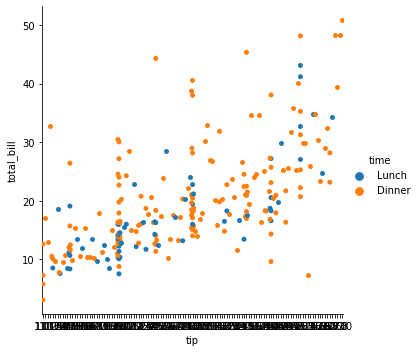

In [50]:
p= sns.catplot(x= "tip", y="total_bill", hue ="time" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

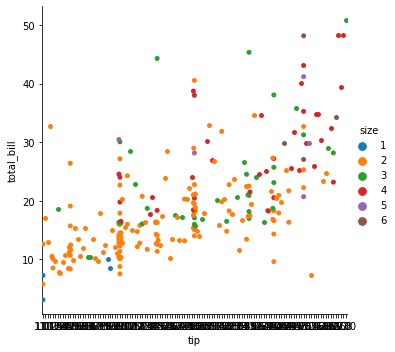

In [51]:
p= sns.catplot(x= "tip", y="total_bill", hue ="size" , kind ="swarm",data=data_resto)



---



---



# Persiapan Segmentasi

**Mengecek Informasi Data**

In [126]:
data_resto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.0 KB


            total_bill       tip      size
total_bill    1.000000  0.674998  0.597589
tip           0.674998  1.000000  0.488400
size          0.597589  0.488400  1.000000


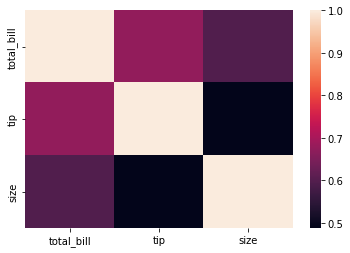

In [127]:
print(data_resto.corr())
c=sns.heatmap(data_resto.corr())



---



**Standarisasi Kolom Numerik**

tujuannya agar variabel  berskala besar tidak mendominasi pembentukan cluster

In [128]:
# Standarisasi Kolom Numerik
# menjadikan data numerik berada pada satu skala 
from sklearn.preprocessing import StandardScaler
kolom_numerik = ['total_bill','tip','size']

In [129]:
# Statistik sebelum Standardisasi
print('\nSebelum standardisasi')
print(data_resto[kolom_numerik ].head())
print('\nStatistik Sebelum Standardisasi')
print(data_resto[kolom_numerik ].describe().round(1))


Sebelum standardisasi
   total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
2       21.01  3.50     3
3       23.68  3.31     2
4       24.59  3.61     4

Statistik Sebelum Standardisasi
       total_bill    tip   size
count       243.0  243.0  243.0
mean         19.8    3.0    2.6
std           8.9    1.4    1.0
min           3.1    1.0    1.0
25%          13.4    2.0    2.0
50%          17.8    2.9    2.0
75%          24.2    3.6    3.0
max          50.8   10.0    6.0


In [130]:
# Standardisasi
data_resto_std = StandardScaler().fit_transform(data_resto[kolom_numerik])

In [131]:
# Membuat DataFrame
data_resto_std = pd.DataFrame(data=data_resto_std, index=data_resto.index, columns=data_resto[kolom_numerik].columns)


In [132]:
# Menampilkan Hasil standarisasi dan summary statistic
print('\nHasil standardisasi')
print(data_resto_std.head())
print('\nStatistik hasil standardisasi')
print(data_resto_std.describe().round(0))


Hasil standardisasi
   total_bill       tip      size
0   -0.317584 -1.441513 -0.601873
1   -1.065471 -0.971231  0.450322
2    0.134522  0.360029  0.450322
3    0.434801  0.222561 -0.601873
4    0.537144  0.439615  1.502517

Statistik hasil standardisasi
       total_bill    tip   size
count       243.0  243.0  243.0
mean         -0.0    0.0   -0.0
std           1.0    1.0    1.0
min          -2.0   -1.0   -2.0
25%          -1.0   -1.0   -1.0
50%          -0.0   -0.0   -1.0
75%           0.0    0.0    0.0
max           3.0    5.0    4.0




---



**Encoding Data Kategorik**

Konversi Kategorikal Data dengan Label Encoder, perlu dilakukan untuk cariabel kategorik sebelum modeliing

In [133]:
# dilakukan konversi data pelanggan dari teks/kategorikal menjadi angka/numerik
from sklearn.preprocessing import LabelEncoder
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['sex','smoker','day','time']  

In [134]:
# Membuat salinan data frame  
data_resto_encode = data_resto[kolom_kategorikal].copy() 
print('\nSebelum encoding')
print(data_resto[kolom_kategorikal ].head()) 


Sebelum encoding
      sex smoker  day    time
0  Female     No  Sun  Dinner
1    Male     No  Sun  Dinner
2    Male     No  Sun  Dinner
3    Male     No  Sun  Dinner
4  Female     No  Sun  Dinner


In [135]:
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    data_resto_encode[col]= LabelEncoder().fit_transform(data_resto_encode[col])      

In [136]:
# Menampilkan data  
print('\nHasil encoding')
print(data_resto_encode.head())


Hasil encoding
   sex  smoker  day  time
0    0       0    2     0
1    1       0    2     0
2    1       0    2     0
3    1       0    2     0
4    0       0    2     0




---



**Menggabungkan Data Setelah Standarisasi dan Encoding**

Menggabungkan Data perlu dilakukan untuk Permodelan

In [137]:
# data kategorik dan data numerik disatukan menjadi dataframe baru (df_model)
data_resto_model= data_resto_encode.merge(data_resto_std, left_index = True, right_index=True, how= 'left')  

In [138]:
print(data_resto_model.head())
data_resto_model.info()

   sex  smoker  day  time  total_bill       tip      size
0    0       0    2     0   -0.317584 -1.441513 -0.601873
1    1       0    2     0   -1.065471 -0.971231  0.450322
2    1       0    2     0    0.134522  0.360029  0.450322
3    1       0    2     0    0.434801  0.222561 -0.601873
4    0       0    2     0    0.537144  0.439615  1.502517
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         243 non-null    int64  
 1   smoker      243 non-null    int64  
 2   day         243 non-null    int64  
 3   time        243 non-null    int64  
 4   total_bill  243 non-null    float64
 5   tip         243 non-null    float64
 6   size        243 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 25.2 KB


**data sudah siap dimodelkan**



---



---



# Model Segmentasi

**akan digunakan *kprototypes*** karena dataset yang digunakan gabungan dari data kategorik dan numerik

In [139]:
# Mencari Jumlah Cluster yang Optimal dengan Elbow Plot
!pip install --upgrade kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes  
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=75)  
    kproto.fit_predict(data_resto_model, categorical=[0,1,2,3])  
    cost [k]= kproto.cost_    

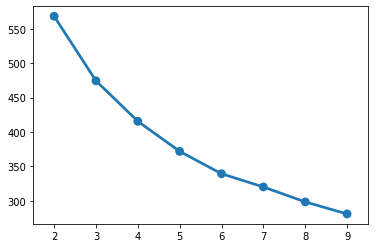

In [140]:
# Memvisualisasikan Elbow Plot  
import matplotlib.pyplot as plt
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

Menurut Elbow Plot diatas 5 merupakan titik siku dari plot, Sehingga dipilih jumlah cluster optimalnya 5


---



**Model**

In [141]:
kproto = KPrototypes(n_clusters = 5,random_state = 75)  
kproto = kproto.fit(data_resto_model, categorical=[0,1,2,3])  

In [142]:
#Save Model  
import pickle
pickle.dump(kproto, open('cluster.pkl', 'wb'))



---



**Cluster**

**akan ditentukan segmen pelanggan** yang ada di data, hasil model yang sudah dibuat dapat digunakan untuk menentukan pelanggan masuk ke dalam cluster yang mana
  

In [143]:
clusters =  kproto.predict(data_resto_model, categorical=[0,1,2,3])    
print('\nSegmen pelanggan: {}\n'.format(clusters))      


Segmen pelanggan: [4 4 1 0 1 3 4 1 4 4 4 3 4 1 2 0 4 1 1 1 0 0 4 3 0 1 4 4 0 0 4 1 4 1 0 1 4
 1 1 3 4 4 4 4 3 0 0 3 1 4 4 2 3 4 1 0 3 4 4 3 0 4 4 1 1 1 4 4 4 4 4 1 0 0
 4 4 0 1 0 2 0 2 2 0 2 3 2 0 0 2 0 0 4 0 0 3 0 4 0 4 2 2 0 0 0 4 0 0 0 0 4
 4 3 0 1 0 3 2 2 1 2 2 2 2 2 3 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2
 2 2 4 4 1 1 1 3 3 1 2 1 1 4 1 4 0 1 4 3 4 4 3 0 0 0 0 0 4 4 2 0 3 0 3 3 0
 3 1 1 1 1 4 0 0 2 0 2 2 3 2 2 0 2 2 1 2 0 3 0 4 0 3 3 4 3 4 1 4 4 1 2 2 4
 2 4 2 2 1 4 0 1 0 4 4 0 4 4 0 3 3 0 0 4 2]





---



**Hasil Cluster**

segmen pelanggan digabung ke data awal

In [144]:
data_resto_final = data_resto.copy()    
data_resto_final['cluster'] = clusters
print(data_resto_final.head())   
print(data_resto_final.info())

   total_bill   tip     sex smoker  day    time  size  cluster
0       16.99  1.01  Female     No  Sun  Dinner     2        4
1       10.34  1.66    Male     No  Sun  Dinner     3        4
2       21.01  3.50    Male     No  Sun  Dinner     3        1
3       23.68  3.31    Male     No  Sun  Dinner     2        0
4       24.59  3.61  Female     No  Sun  Dinner     4        1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
 7   cluster     243 non-null    uint16  
dtypes: category(4), float64(2), int64(1), uint16(1)
memory usage: 19.5 KB
None


In [145]:
# Menampilkan Cluster Tiap Pelanggan
for i in range (0,5):
 print('\nPelanggan cluster: {}\n'.format(i))
 print(data_resto_final[data_resto_final['cluster']== i])


Pelanggan cluster: 0

     total_bill   tip     sex smoker   day    time  size  cluster
3         23.68  3.31    Male     No   Sun  Dinner     2        0
15        21.58  3.92    Male     No   Sun  Dinner     2        0
20        17.92  4.08    Male     No   Sat  Dinner     2        0
21        20.29  2.75  Female     No   Sat  Dinner     2        0
24        19.82  3.18    Male     No   Sat  Dinner     2        0
28        21.70  4.30    Male     No   Sat  Dinner     2        0
29        19.65  3.00  Female     No   Sat  Dinner     2        0
34        17.78  3.27    Male     No   Sat  Dinner     2        0
45        18.29  3.00    Male     No   Sun  Dinner     2        0
46        22.23  5.00    Male     No   Sun  Dinner     2        0
55        19.49  3.51    Male     No   Sun  Dinner     2        0
60        20.29  3.21    Male    Yes   Sat  Dinner     2        0
72        26.86  3.14  Female    Yes   Sat  Dinner     2        0
73        25.28  5.00  Female    Yes   Sat  Dinner   



---



**Visualisasi Hasil Clustering dengan Box Plot (data numerikal)**

tujuannya untuk mempermudah dalam penamaan di tiap tiap cluster

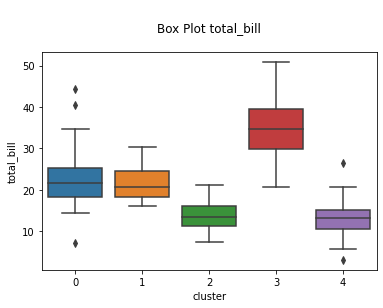

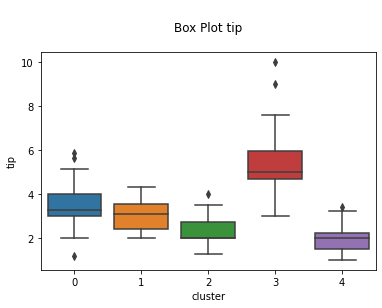

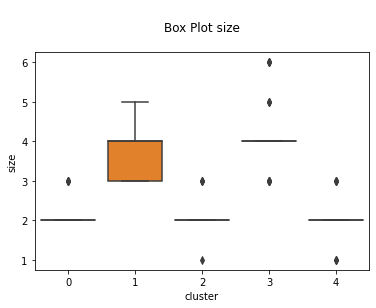

In [146]:
# Data Numerical
kolom_numerik = ['total_bill','tip','size']    
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = data_resto_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()



---



**Visualisasi Hasil Clustering dengan Count Plot (data kategorikal)**

tujuannya juga untuk mempermudah dalam penamaan di tiap tiap cluster

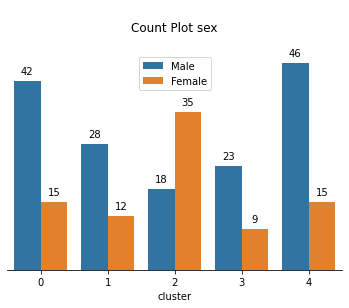

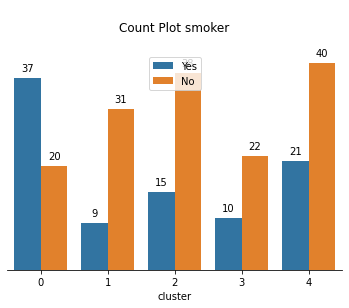

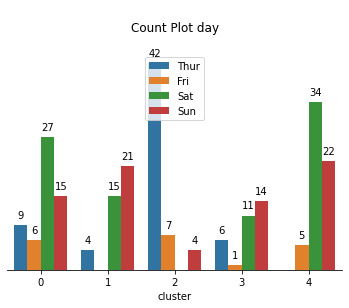

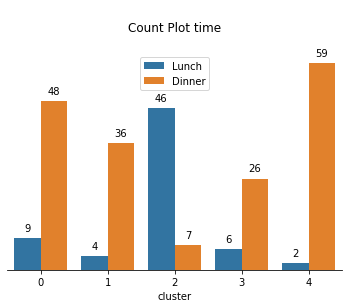

In [147]:
# Data Kategorikal  
kolom_categorical = ['sex','smoker','day','time']  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = data_resto_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax. legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')       
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  



---


---





# Hasil Segmentasi

**Penamaan Cluster**

dari hasil analisis data, ke 5 dapat di indentifikasi sebagai


1.   **Cluster 0** : Pengunjung yang total tagihannya & tip tergolong sedang, pengunjung dinner terbanyak ke 2, dan pengunjung dengan perokok paling banyak.
2.   **Cluster 1** : Pengunjung yang total tagihannya & tip tergolong sedang, pengunjung dinner terbanyak ke 3, dan pengunjung dengan perokok paling sedikit.
3.   **Cluster 2** : Pengunjung yang total tagihannya & tip tergolong rendang, pengunjung dinner paling sedikit, tapi lunch paling banyak, dan paling ramai pengunjung di hari kamis.
4.   **Cluster 3** : Pengunjung yang total tagihannya & tip tergolong tinggi, pengunjung dinner tersedikit ke 2, dan paling sepi pengunjung di hari jumat.
5.   **Cluster 4** : Pengunjung dyang total tagihannya & tip tergolong rendah, pengunjung dinner paling banyak, tapi lunch paling sedikit, dan paling ramai pengunjung di hari sabtu.











dan untuk penamaan bisa dinamakan : 


1.   **Cluster 0** = Super Great
2.   **Cluster 1** = Super Awesome
3.   **Cluster 2** = Super Best
4.   **Cluster 3** = Super Amazing
5.   **Cluster 4** = Super Cool



In [148]:
data_resto_final['Client Type'] = data_resto_final['cluster'].map({  
    0: 'Super Great',  
    1: 'Super Awesome',  
    2: 'Super Best',  
    3: 'Super Amazing',  
    4: 'Super Cool'  
})  
print(data_resto_final.info())
print(data_resto_final.head(8))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   total_bill   243 non-null    float64 
 1   tip          243 non-null    float64 
 2   sex          243 non-null    category
 3   smoker       243 non-null    category
 4   day          243 non-null    category
 5   time         243 non-null    category
 6   size         243 non-null    int64   
 7   cluster      243 non-null    uint16  
 8   Client Type  243 non-null    object  
dtypes: category(4), float64(2), int64(1), object(1), uint16(1)
memory usage: 21.4+ KB
None
   total_bill   tip     sex smoker  day    time  size  cluster    Client Type
0       16.99  1.01  Female     No  Sun  Dinner     2        4     Super Cool
1       10.34  1.66    Male     No  Sun  Dinner     3        4     Super Cool
2       21.01  3.50    Male     No  Sun  Dinner     3        1  Super Awesome
3       23.68  3.31

In [149]:
data_resto_final

,total_bill,tip,sex,smoker,day,time,size,cluster,Client Type
0,16.99,1.01,Female,No,Sun,Dinner,2,4,Super Cool
1,10.34,1.66,Male,No,Sun,Dinner,3,4,Super Cool
2,21.01,3.50,Male,No,Sun,Dinner,3,1,Super Awesome
3,23.68,3.31,Male,No,Sun,Dinner,2,0,Super Great
4,24.59,3.61,Female,No,Sun,Dinner,4,1,Super Awesome
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3,Super Amazing
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,Super Great
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,Super Great
242,17.82,1.75,Male,No,Sat,Dinner,2,4,Super Cool


Hasil Segmentasi, dimana : 
1.   **Super Great** : Pengunjung yang total tagihannya & tip tergolong sedang, pengunjung dinner terbanyak ke 2, dan pengunjung dengan perokok paling banyak.
2.   **Super Awesome** : Pengunjung yang total tagihannya & tip tergolong sedang, pengunjung dinner terbanyak ke 3, dan pengunjung dengan perokok paling sedikit.
3.   **Super Best** : Pengunjung yang total tagihannya & tip tergolong rendang, pengunjung dinner paling sedikit, tapi lunch paling banyak, dan paling ramai pengunjung di hari kamis.
4.   **Super Awesome** : Pengunjung yang total tagihannya & tip tergolong tinggi, pengunjung dinner tersedikit ke 2, dan paling sepi pengunjung di hari jumat.
5.   **Super Cool** : Pengunjung dyang total tagihannya & tip tergolong rendah, pengunjung dinner paling banyak, tapi lunch paling sedikit, dan paling ramai pengunjung di hari sabtu.



---


---


